In [3]:
!pip install librosa


Defaulting to user installation because normal site-packages is not writeable
  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
   ---------------------------------------- 0.0/164.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/164.9 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/164.9 kB 330.3 kB/s eta 0:00:01
   ------------ -------------------------- 51.2/164.9 kB 435.7 kB/s eta 0:00:01
   ----------------------- -------------- 102.4/164.9 kB 653.6 kB/s eta 0:00:01
   --------------------------------

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
    

In [11]:
import IPython.display as ipd
import librosa
import librosa.display

In [17]:
filename='RAVDESS Emotional speech audio/Actor_02/03-01-01-01-01-01-02.wav'

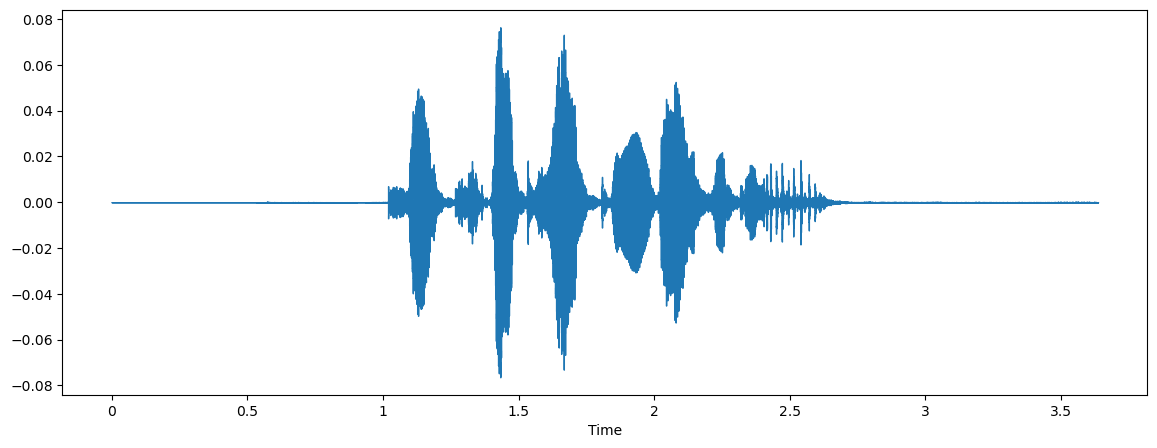

In [25]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [21]:
data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -1.2893076e-06,  1.0079392e-06, -7.8646877e-07], dtype=float32)

In [23]:
sample_rate

22050

In [27]:
filename="03-01-01-01-01-01-02.wav"

In [34]:
class_label = filename.split('-')
print(class_label[2])

01


In [112]:

import os
def classify_audio_files(folder_path):
    """
    Classify audio files based on their filenames and return a DataFrame with filenames and their classes.
    
    Parameters:
        folder_path (str): Path to the folder containing audio files.
    
    Returns:
        pd.DataFrame: DataFrame with filenames and their classes.
    """
    # Initialize an empty list to store file information
    file_info = []
    
    emotion_mapping={1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised' }
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            # Extract the class from the filename
            class_label = filename.split('-')[2]  # Assuming class is represented by the first part of the filename
            file_info.append({'filepath': path+'/' +filename, 'class': emotion_mapping[int(class_label)]})
    
    # Create a DataFrame from the file information
    df = pd.DataFrame(file_info)
    
    return df

In [120]:
columns = ['filepath', 'class']
df = pd.DataFrame(columns=columns)
for entry in os.listdir('RAVDESS Emotional speech audio'):
        path = 'RAVDESS Emotional speech audio'+'/'+ entry
        if not entry=='audio_speech_actors_01-24':
            df=pd.concat([df,classify_audio_files(path)])

In [122]:
df

,filepath,class
0,RAVDESS Emotional speech audio/Actor_01/03-01-...,neutral
1,RAVDESS Emotional speech audio/Actor_01/03-01-...,neutral
2,RAVDESS Emotional speech audio/Actor_01/03-01-...,neutral
3,RAVDESS Emotional speech audio/Actor_01/03-01-...,neutral
4,RAVDESS Emotional speech audio/Actor_01/03-01-...,calm
...,...,...
55,RAVDESS Emotional speech audio/Actor_24/03-01-...,surprised
56,RAVDESS Emotional speech audio/Actor_24/03-01-...,surprised
57,RAVDESS Emotional speech audio/Actor_24/03-01-...,surprised
58,RAVDESS Emotional speech audio/Actor_24/03-01-...,surprised


In [ ]:
path = os.path.join('RAVDESS Emotional speech audio', entry)

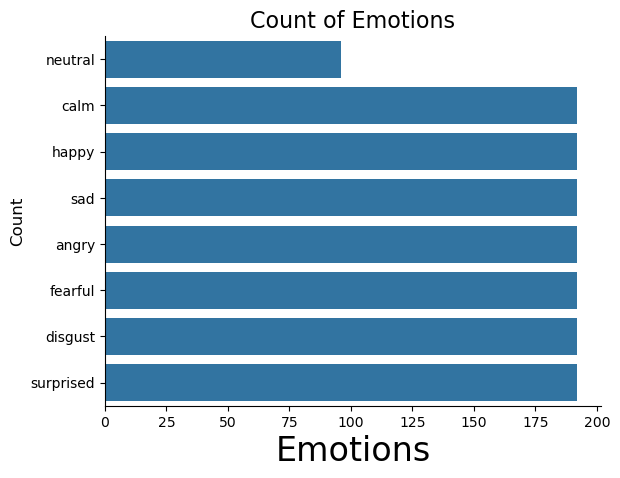

In [140]:
import seaborn as sns
plt.title('Count of Emotions', size=16)
sns.countplot(df['class'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=24)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [168]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

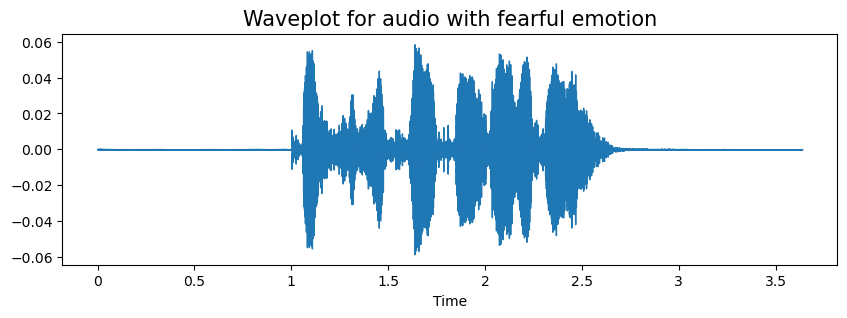

[[ 5.0198130e-04+0.0000000e+00j  6.3499558e-04+0.0000000e+00j
  -5.4365594e-04+0.0000000e+00j ...  8.6687927e-05+0.0000000e+00j
  -3.0311572e-04+0.0000000e+00j -4.1342224e-05+0.0000000e+00j]
 [-3.9393551e-04+9.4295462e-04j -1.0120618e-03-7.9047249e-04j
   6.5469154e-04-3.1969912e-04j ...  1.7170404e-04-5.8487192e-04j
   1.9903928e-04+2.0019141e-04j -6.7768531e-05+7.4566422e-05j]
 [-5.8848358e-04-2.4386665e-03j -1.0926530e-03+9.1934262e-04j
  -1.1458491e-03+1.5075535e-03j ... -6.0801377e-04+2.5546859e-04j
  -1.2244545e-04-8.3948908e-05j  9.5470830e-05+9.0691916e-05j]
 ...
 [-1.7349570e-05-3.9737267e-07j  8.7742646e-06+1.8617740e-07j
  -1.1524723e-09+2.7076008e-09j ...  6.7666167e-10-4.2195911e-10j
  -1.8765164e-10+3.9649153e-10j  5.2758437e-11+3.0846009e-10j]
 [ 1.7330723e-05+1.9879809e-07j  9.3746294e-08-8.7625212e-06j
   5.5793442e-10-9.4611419e-10j ...  1.1430013e-11-1.8028096e-10j
  -5.0628396e-10+1.3084865e-10j  1.8365495e-10+5.1573090e-11j]
 [-1.7324273e-05+0.0000000e+00j -8.75979

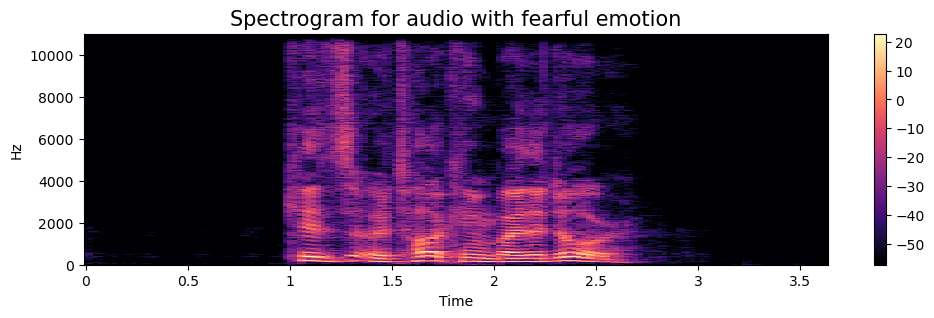

In [166]:
emotion='fearful'
path = np.array(df.filepath[df['class']==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

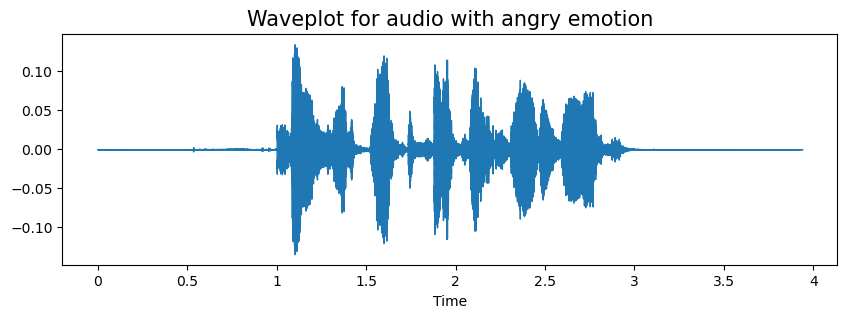

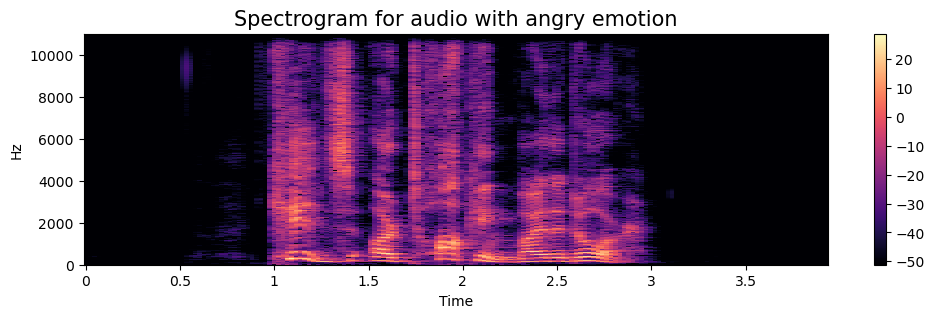

In [176]:
emotion='angry'
path = np.array(df.filepath[df['class']==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

In [180]:
#Data Augmentation
#Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

In [258]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.filepath)[145]
data, sample_rate = librosa.load(path)


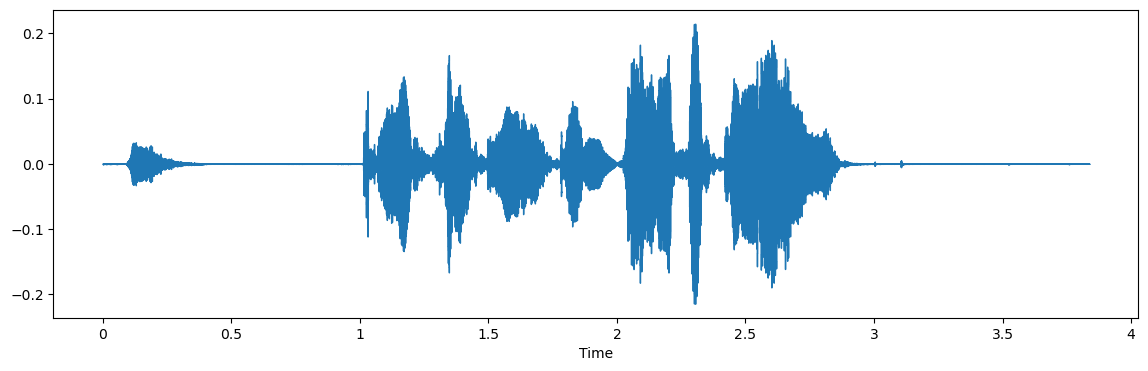

In [244]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(data,rate=sample_rate)

0.0007398687722220083
0.00042156647562215224


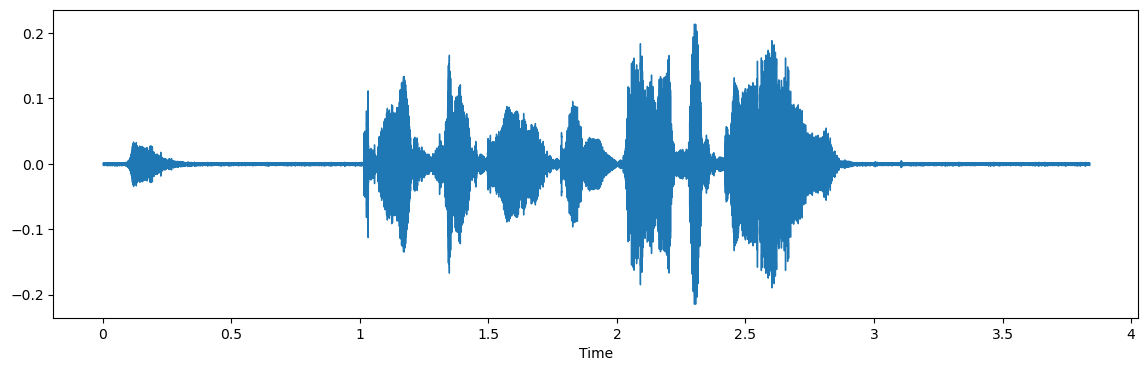

In [246]:
#noise injection
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=noise(data), sr=sample_rate)
ipd.Audio(noise(data),rate=sample_rate)

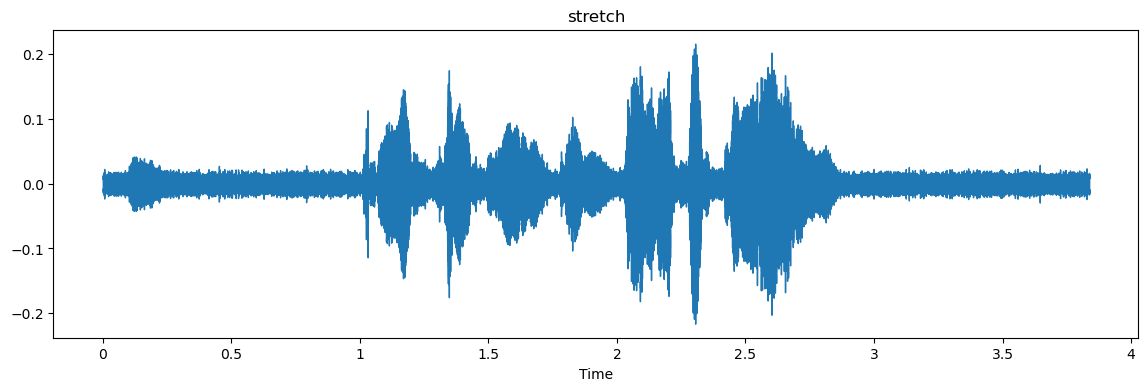

In [236]:
#other augmentation


plt.figure(figsize=(14,4))
plt.title('stretch')
librosa.display.waveshow(y=noise(data), sr=sample_rate)
ipd.Audio(stretch(data,0.8),rate=sample_rate)



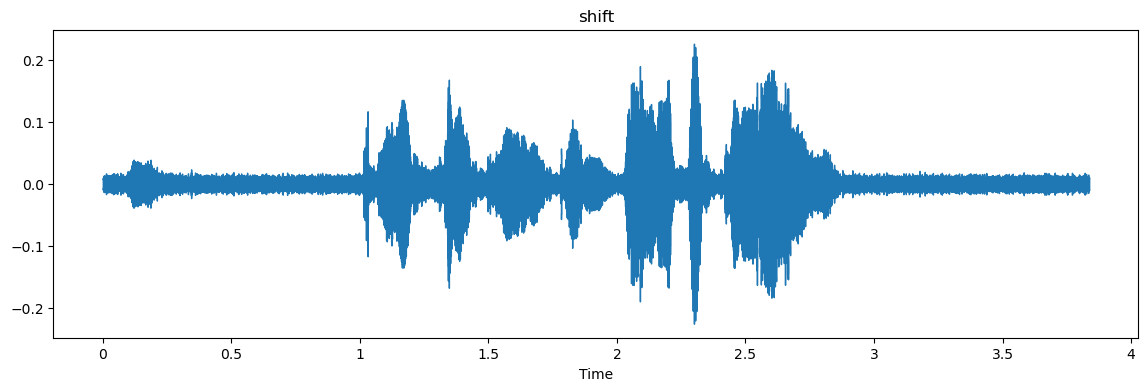

In [238]:
plt.figure(figsize=(14,4))
plt.title('shift')
librosa.display.waveshow(y=noise(data), sr=sample_rate)
ipd.Audio(shift(data),rate=sample_rate)



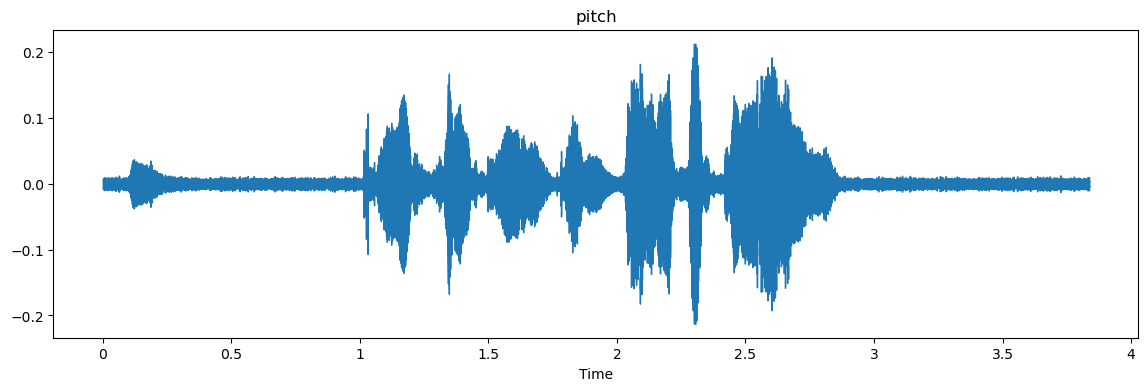

In [240]:
plt.figure(figsize=(14,4))
plt.title('pitch')
librosa.display.waveshow(y=noise(data), sr=sample_rate)
ipd.Audio(pitch(data,sample_rate),rate=sample_rate)

In [248]:
#Feature Extraction
def extract_features(data):
    # ZCR(zero crossing rate)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [260]:
X, Y = [], []
for path, emotion in zip(df.filepath, df['class']):
    feature = get_features(path)
    for p in feature:
        X.append(p)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [270]:
len(X), len(Y), df.filepath.shape


(4320, 4320, (1440,))

In [272]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753971,...,4.310903e-06,3.291511e-06,2.148075e-06,2.279739e-06,5.116493e-06,8.190282e-06,0.000007,0.000005,4.245834e-07,neutral
1,0.319743,0.774195,0.819572,0.806651,0.815200,0.818905,0.730940,0.669737,0.715620,0.761201,...,5.710182e-05,5.510627e-05,5.126385e-05,5.539630e-05,5.644345e-05,5.753952e-05,0.000060,0.000055,5.230863e-05,neutral
2,0.188256,0.622125,0.699215,0.753343,0.721212,0.701727,0.682356,0.662828,0.686486,0.733960,...,8.579052e-07,9.576654e-07,7.733596e-07,5.233101e-07,3.592860e-07,9.261693e-07,0.000002,0.000001,7.753986e-08,neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984504e-06,7.034949e-06,6.654923e-06,6.979548e-06,1.214236e-05,9.640184e-06,0.000011,0.000006,4.254087e-07,neutral
4,0.341557,0.807791,0.852978,0.828556,0.801201,0.809001,0.711516,0.674151,0.726692,0.754696,...,2.007702e-04,2.118522e-04,2.042778e-04,1.935847e-04,2.026326e-04,1.924727e-04,0.000198,0.000189,1.915693e-04,neutral


In [314]:
#Data Preparation
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [288]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [316]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [318]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [322]:
#standarizing data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [324]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [332]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.12.1-cp312-cp312-win_amd64.whl.metadata (48 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl (127 kB)
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
Using cached optree-0.12.1-cp312-cp312-win_amd64.whl (267 kB)


In [342]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [347]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint


In [349]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

C:\Users\PCS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [351]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.1761 - loss: 2.0381 - val_accuracy: 0.2731 - val_loss: 1.9010 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.2127 - loss: 1.9368 - val_accuracy: 0.3231 - val_loss: 1.8218 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.2572 - loss: 1.8735 - val_accuracy: 0.3222 - val_loss: 1.7869 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.2677 - loss: 1.8367 - val_accuracy: 0.3139 - val_loss: 1.7419 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.2643 - loss: 1.8347 - val_accuracy: 0.3741 - val_loss: 1.6723 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.3242 - loss: 1.7557 - val_accuracy: 0.3722 - val_loss: 1.6825 - learning_rate: 0.0010
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.3327 - loss: 1.7448 -

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6363 - loss: 1.3487
Accuracy of our model on test data :  64.81481194496155 %


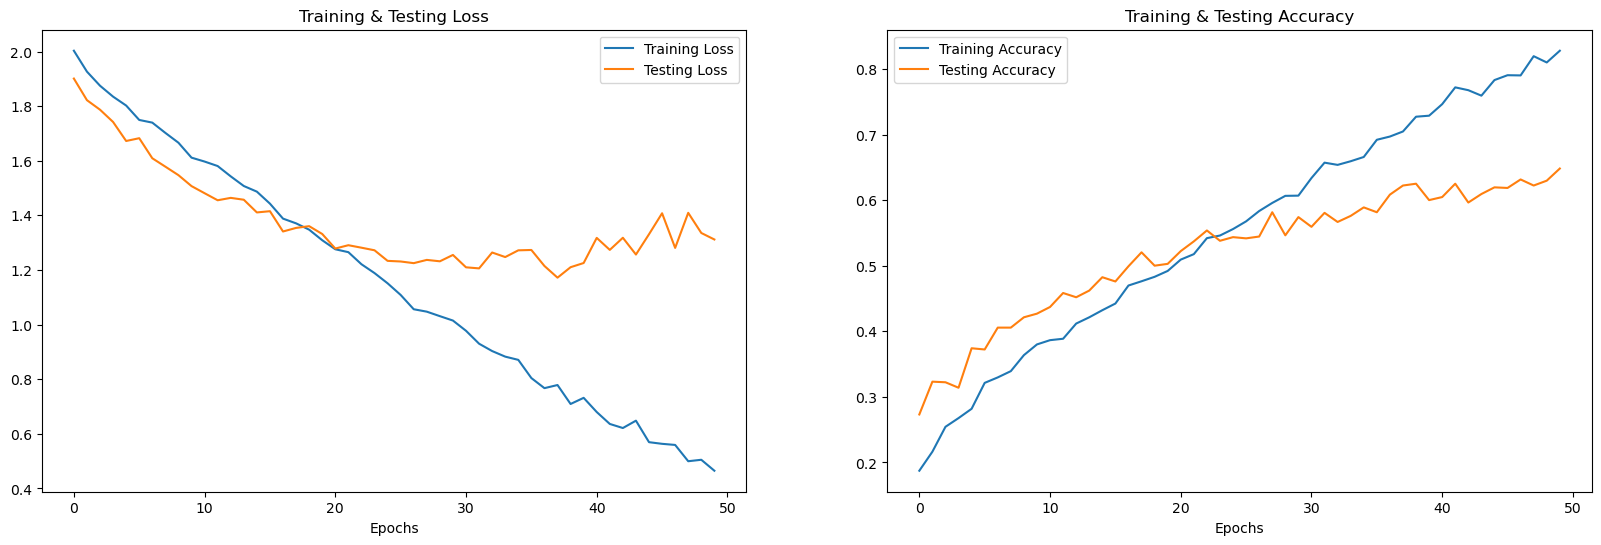

In [353]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [355]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [357]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fearful,fearful
1,angry,angry
2,fearful,fearful
3,calm,calm
4,angry,angry
5,disgust,surprised
6,sad,fearful
7,happy,happy
8,fearful,fearful
9,calm,sad
